<a href="https://colab.research.google.com/github/muhnasih/MESIN-LEARNING/blob/main/UTS_MESIN_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install annoy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551806 sha256=311d967f27a6256723e97f15b9e25d15e7fc71b96662bd743e2447ac6876109f
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('/content/heart.csv')

df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Bagian 1 – Load Dataset & Penjelasan Singkat**

In [8]:
import pandas as pd

# 1. LOAD DATASET
df = pd.read_csv('heart.csv')

# Penjelasan Singkat
print("=== INFORMASI DATASET ===")
print(f"Jumlah sampel (baris): {df.shape[0]}")
print(f"Jumlah fitur (kolom): {df.shape[1]}")
print("\nTipe data setiap kolom:")
print(df.dtypes)

print("\nCek Missing Values:")
print(df.isnull().sum())

print("\n5 Data Teratas:")
display(df.head())

print("\nStatistik Deskriptif:")
display(df.describe())


=== INFORMASI DATASET ===
Jumlah sampel (baris): 1025
Jumlah fitur (kolom): 14

Tipe data setiap kolom:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Cek Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

5 Data Teratas:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Statistik Deskriptif:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Bagian 2 – Preprocessing Dataset**

In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler

print("=== PREPROCESSING DATA ===")

print("Missing values tiap kolom:")
print(df.isnull().sum())

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Imputasi median untuk kolom {col}")
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"Imputasi modus untuk kolom {col}")

if 'chol' in df.columns and 'trestbps' in df.columns:
    df['chol_trest_ratio'] = df['chol'] / (df['trestbps'] + 1e-6)

if 'thalach' in df.columns and 'age' in df.columns:
    df['heart_rate_age_diff'] = df['thalach'] - df['age']

print("\nFitur baru berhasil ditambahkan (jika kolom tersedia).")

features = [col for col in df.columns if col != 'target']
X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nData berhasil dinormalisasi.")
print("Shape data sebelum:", X.shape)
print("Shape data sesudah scaling:", X_scaled.shape)


=== PREPROCESSING DATA ===
Missing values tiap kolom:
age                    0
sex                    0
cp                     0
trestbps               0
chol                   0
fbs                    0
restecg                0
thalach                0
exang                  0
oldpeak                0
slope                  0
ca                     0
thal                   0
target                 0
chol_trest_ratio       0
heart_rate_age_diff    0
dtype: int64

Fitur baru berhasil ditambahkan (jika kolom tersedia).

Data berhasil dinormalisasi.
Shape data sebelum: (1025, 15)
Shape data sesudah scaling: (1025, 15)


**Bagian 3 – Clustering KMeans & DBSCAN**

=== CLUSTERING KMEANS & DBSCAN ===

--- KMeans ---
Jumlah Cluster: 3
Silhouette Score: 0.1224
Davies–Bouldin Score: 2.2558

--- DBSCAN ---
Cluster Ditemukan (tanpa -1 noise): 4
Silhouette Score: -0.1669740242604239
Davies–Bouldin Score: 1.223970063339141


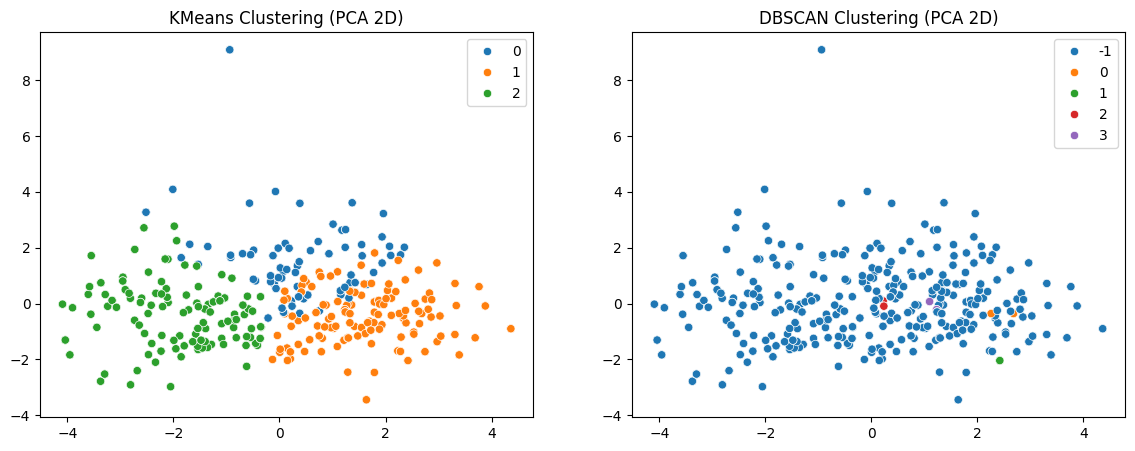

In [11]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

print("=== CLUSTERING KMEANS & DBSCAN ===")


kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_db_index = davies_bouldin_score(X_scaled, kmeans_labels)

print("\n--- KMeans ---")
print(f"Jumlah Cluster: 3")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Davies–Bouldin Score: {kmeans_db_index:.4f}")


dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

unique_labels = set(dbscan_labels) - {-1}
if len(unique_labels) >= 2:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    dbscan_db_index = davies_bouldin_score(X_scaled, dbscan_labels)
else:
    dbscan_silhouette = None
    dbscan_db_index = None

print("\n--- DBSCAN ---")
print(f"Cluster Ditemukan (tanpa -1 noise): {len(unique_labels)}")
print(f"Silhouette Score: {dbscan_silhouette}")
print(f"Davies–Bouldin Score: {dbscan_db_index}")


pca = PCA(n_components=2)
pca_results = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1],
                hue=kmeans_labels, palette='tab10', ax=ax[0])
ax[0].set_title("KMeans Clustering (PCA 2D)")

sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1],
                hue=dbscan_labels, palette='tab10', ax=ax[1])
ax[1].set_title("DBSCAN Clustering (PCA 2D)")

plt.show()


**Bagian 4 – Implementasi Annoy (3–5 query acak + index + tetangga & jarak)**

In [12]:

import sys
import random
import numpy as np

try:
    from annoy import AnnoyIndex
except Exception:
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "annoy"])
    from annoy import AnnoyIndex


dim = X_scaled.shape[1]
n_trees = 50
metric = 'euclidean'

print(f"Building Annoy index with dim={dim}, n_trees={n_trees}, metric={metric} ...")

t = AnnoyIndex(dim, metric)

for i, vec in enumerate(X_scaled):
    t.add_item(i, vec.astype(np.float32))
t.build(n_trees)
print("Annoy index built.")

index_path = 'annoy_heart_index.ann'
t.save(index_path)
print(f"Annoy index saved to {index_path}")

n_queries = random.randint(3, 5)
query_indices = random.sample(range(X_scaled.shape[0]), n_queries)
print(f"\nSelected {n_queries} random query indices: {query_indices}\n")

n_neighbors = 10
for qi in query_indices:
    query_vec = X_scaled[qi]
    neighbors, distances = t.get_nns_by_vector(query_vec.astype(np.float32), n_neighbors, include_distances=True)

    print(f"=== Query index: {qi} ===")
    print(f"Query vector (first 8 dims): {np.round(query_vec[:8], 4)}")
    print(f"Returned neighbors (count={len(neighbors)}):")
    for rank, (nbr, dist) in enumerate(zip(neighbors, distances), start=1):
        print(f"  {rank:02d}. idx={nbr:4d}  distance={dist:.6f}")
    print("")



Building Annoy index with dim=15, n_trees=50, metric=euclidean ...
Annoy index built.
Annoy index saved to annoy_heart_index.ann

Selected 3 random query indices: [771, 136, 612]

=== Query index: 771 ===
Query vector (first 8 dims): [-1.0404 -1.5117 -0.9158  0.3649 -0.1939 -0.4189 -1.004   0.1255]
Returned neighbors (count=10):
  01. idx=  95  distance=0.000000
  02. idx= 771  distance=0.000000
  03. idx= 953  distance=0.000000
  04. idx= 355  distance=0.271880
  05. idx= 408  distance=0.271880
  06. idx= 640  distance=0.271880
  07. idx= 320  distance=2.614772
  08. idx= 635  distance=2.614772
  09. idx= 954  distance=2.614772
  10. idx= 280  distance=2.733851

=== Query index: 136 ===
Query vector (first 8 dims): [ 0.0624 -1.5117  0.0559  0.0222  1.8616 -0.4189  0.8913  0.7343]
Returned neighbors (count=10):
  01. idx=  44  distance=0.000000
  02. idx= 136  distance=0.000000
  03. idx= 263  distance=0.000000
  04. idx= 302  distance=0.000000
  05. idx= 288  distance=1.716506
  06. i